In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
drugDataDF = pd.read_csv(mouse_drug_data_to_load)
clinicalTrialDF = pd.read_csv(clinical_trial_data_to_load)

In [2]:
# Combine the data into a single dataset
mergeDF = clinicalTrialDF.merge(drugDataDF, on = 'Mouse ID')

In [3]:
mergeDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to Series, Preview DataFrame

tumorVolMean = mergeDF.groupby(['Drug', 'Timepoint']).mean()
tumorVolMean = tumorVolMean['Tumor Volume (mm3)']
pd.DataFrame(tumorVolMean).head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to Series, Preview DataFrame

tumorVolSE = mergeDF.groupby(['Drug', 'Timepoint']).sem()
tumorVolSE = tumorVolSE['Tumor Volume (mm3)']
pd.DataFrame(tumorVolSE).head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [6]:
# Minor Data Munging to Re-Format the Series into a DataFrame
tumorVolMean = tumorVolMean.unstack(level = 0)
tumorVolSE = tumorVolSE.unstack(level = 0)
# Preview that Reformatting worked
tumorVolMean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


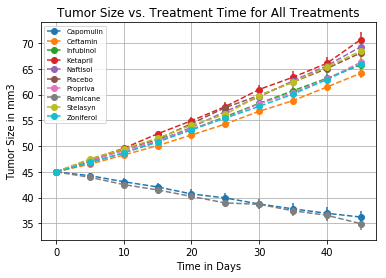

In [7]:
# Generate the Plot for ALL Treatments (with Error Bars)
# When tumorVolMean and tumorVolSE were Dataframes instead of Series, the legend included 
# the column index 'Tumor Volume (mm3)' in the labels.

#Iterate across all column indices to plot mean tumor volume for each treatment
for drug in tumorVolMean.columns.tolist():
    plt.plot(tumorVolMean.index, tumorVolMean[drug], '--o')

#Generate legend for all treatments
plt.legend(loc='best',fontsize = 'x-small')

#Iterate across all column indices to plot error bars equal to standard error of the mean
for drug in tumorVolMean.columns.tolist():
    plt.errorbar(tumorVolMean.index, tumorVolMean[drug], yerr = tumorVolSE[drug], fmt = 'none')
    
#Format Graph
plt.grid(b=True,axis='both')
plt.xlabel('Time in Days')
plt.ylabel('Tumor Size in mm3')
plt.title('Tumor Size vs. Treatment Time for All Treatments')

# Save the Figure to Same Directory
plt.savefig("./Images/TumSizevTime_AllTreatments.png")

#Show Figure
plt.show()

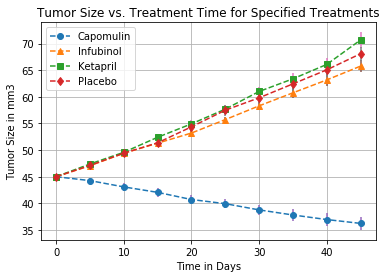

In [8]:
#Generate Plot for 4 specfied treatments in the starter notebook
plt.plot(tumorVolMean.index, tumorVolMean['Capomulin'], '--o')
plt.plot(tumorVolMean.index, tumorVolMean['Infubinol'], '--^')
plt.plot(tumorVolMean.index, tumorVolMean['Ketapril'], '--s')
plt.plot(tumorVolMean.index, tumorVolMean['Placebo'], '--d')

#Configure legend for specified treatments
plt.legend(loc='best')

#Generate Error Bars for 4 specified treaments equal to standard error of the mean
plt.errorbar(tumorVolMean.index, tumorVolMean['Capomulin'], yerr = tumorVolSE['Capomulin'], fmt = 'none')
plt.errorbar(tumorVolMean.index, tumorVolMean['Infubinol'], yerr = tumorVolSE['Infubinol'], fmt = 'none')
plt.errorbar(tumorVolMean.index, tumorVolMean['Ketapril'], yerr = tumorVolSE['Ketapril'], fmt = 'none')
plt.errorbar(tumorVolMean.index, tumorVolMean['Placebo'], yerr = tumorVolSE['Placebo'], fmt = 'none')

#Format Graph
plt.grid(b=True,axis='both')
plt.xlabel('Time in Days')
plt.ylabel('Tumor Size in mm3')
plt.title('Tumor Size vs. Treatment Time for Specified Treatments')

# Save the Figure to Same Directory
plt.savefig("./Images/TumSizevTime_SpecTreatments.png")

#Show Figure
plt.show()

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to Series, Preview DataFrame
metSiteMean = mergeDF.groupby(['Drug', 'Timepoint']).mean()
metSiteMean = metSiteMean['Metastatic Sites']
pd.DataFrame(metSiteMean).head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to Series, Preview DataFrame
metSiteSE = mergeDF.groupby(['Drug', 'Timepoint']).sem()
metSiteSE = metSiteSE['Metastatic Sites']
pd.DataFrame(metSiteSE).head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [11]:
# Minor Data Munging to Re-Format the Series into a DataFrame
metSiteMean = metSiteMean.unstack(level = 0)
metSiteSE = metSiteSE.unstack(level = 0)
# Preview that Reformatting worked
metSiteMean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


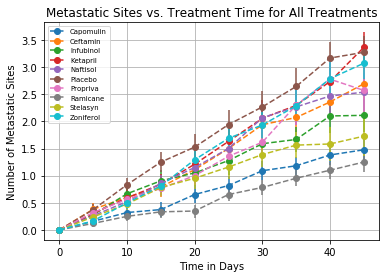

In [12]:
# Generate the Plot for All Treatments (with Error Bars)
# When metSiteMean and metSiteSE were Dataframes instead of Series, the legend included 
# the column index 'Metastatic Sites' in the labels.

#Iterate across all column indices to plot mean tumor volume for each treatment
for drug in metSiteMean.columns.tolist():
    plt.plot(metSiteMean.index, metSiteMean[drug], '--o')

#Generate legend for all treatments
plt.legend(loc='best',fontsize = 'x-small')

#Iterate across all column indices to plot error bars equal to standard error of the mean
for drug in metSiteMean.columns.tolist():
    plt.errorbar(metSiteMean.index, metSiteMean[drug], yerr = metSiteSE[drug],fmt = 'none')

#Format Graph
plt.grid(b=True,axis='both')
plt.xlabel('Time in Days')
plt.ylabel('Number of Metastatic Sites')
plt.title('Metastatic Sites vs. Treatment Time for All Treatments')

# Save the Figure to Same Directory
plt.savefig("./Images/MetSitesvTime_AllTreatments.png")

#Show Figure
plt.show()

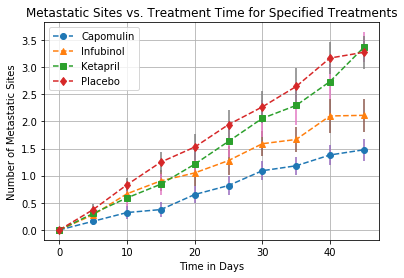

In [13]:
#Generate Plot for 4 specfied treatments in the starter notebook
plt.plot(metSiteMean.index, metSiteMean['Capomulin'], '--o')
plt.plot(metSiteMean.index, metSiteMean['Infubinol'], '--^')
plt.plot(metSiteMean.index, metSiteMean['Ketapril'], '--s')
plt.plot(metSiteMean.index, metSiteMean['Placebo'], '--d')

#Configure legend for specified treatments
plt.legend(loc='best')

#Generate Error Bars for 4 specified treaments equal to standard error of the mean
plt.errorbar(metSiteMean.index, metSiteMean['Capomulin'], yerr = metSiteSE['Capomulin'], fmt = 'none')
plt.errorbar(metSiteMean.index, metSiteMean['Infubinol'], yerr = metSiteSE['Infubinol'], fmt = 'none')
plt.errorbar(metSiteMean.index, metSiteMean['Ketapril'], yerr = metSiteSE['Ketapril'], fmt = 'none')
plt.errorbar(metSiteMean.index, metSiteMean['Placebo'], yerr = metSiteSE['Placebo'], fmt = 'none')

#Format Graph
plt.grid(b=True,axis='both')
plt.xlabel('Time in Days')
plt.ylabel('Number of Metastatic Sites')
plt.title('Metastatic Sites vs. Treatment Time for Specified Treatments')

# Save the Figure to Same Directory
plt.savefig("./Images/MetSitesvTime_SpecTreatments.png")

#Show Figure
plt.show()

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to Series, Preview DataFrame

survivalCount = mergeDF.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()
pd.DataFrame(survivalCount).head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [15]:
# Minor Data Munging to Re-Format the Data Frames
survivalCount = survivalCount.unstack(level = 0)
# Preview the Data Frame
survivalCount.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [16]:
#Create new DataFrame to store Survival Percentages
survivalCountPct = survivalCount
for drug in survivalCountPct.columns.tolist():
    #Starting number of mice is the first row in each treatment column
    startNum = survivalCountPct[drug][0]
    
    #Convert all counts to percentages
    survivalCountPct[drug] = survivalCountPct[drug]*(100/startNum)

#Display surivalCountPct head
survivalCountPct.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0


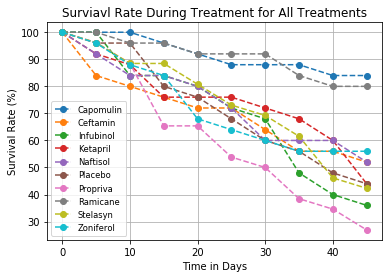

In [17]:
# Generate the Plot (Accounting for percentages)

#Iterate across all column indices to plot mean tumor volume for each treatment
for drug in survivalCountPct.columns.tolist():
    plt.plot(survivalCountPct.index, survivalCountPct[drug], '--o')

#Generate legend for all treatments
plt.legend(loc='best',fontsize = 'small')

#Format Graph
plt.grid(b=True,axis='both')
plt.xlabel('Time in Days')
plt.ylabel('Survival Rate (%)')
plt.title('Surviavl Rate During Treatment for All Treatments')

# Save the Figure to Same Directory
plt.savefig("./Images/SurvRate_AllTreatments.png")

#Show Figure
plt.show()

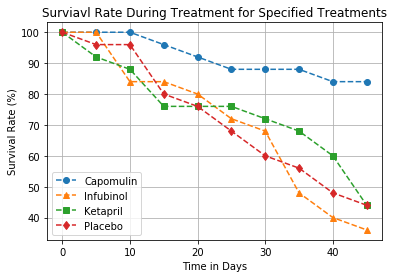

In [18]:
#Generate Plot for 4 specfied treatments in the starter notebook
plt.plot(survivalCountPct.index, survivalCountPct['Capomulin'], '--o')
plt.plot(survivalCountPct.index, survivalCountPct['Infubinol'], '--^')
plt.plot(survivalCountPct.index, survivalCountPct['Ketapril'], '--s')
plt.plot(survivalCountPct.index, survivalCountPct['Placebo'], '--d')

#Configure legend for specified treatments
plt.legend(loc='best')

#Format Graph
plt.grid(b=True,axis='both')
plt.xlabel('Time in Days')
plt.ylabel('Survival Rate (%)')
plt.title('Surviavl Rate During Treatment for Specified Treatments')

# Save the Figure to Same Directory
plt.savefig("./Images/SurvRate_SpecTreatments.png")

#Show Figure
plt.show()

## Summary Bar Graph

In [19]:
# Calculate the percent changes for each drug
drugList = []
tumorVolChange = []
for drug in tumorVolMean.columns.tolist():
    drugList.append(drug)
    tumorVolChange.append((tumorVolMean[drug][45]-tumorVolMean[drug][0])/tumorVolMean[drug][0]*100)

summary = pd.Series(data = tumorVolChange, index = drugList, name = 'Tumor Pct Change')

# Display the data to confirm
sumDF = pd.DataFrame(summary)
sumDF

,Tumor Pct Change
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134
Zoniferol,46.579751


In [20]:
#Create summary labels formatted for treatments that both saw increased and decreased tumor volume
sumgraphlabelsg = []
sumgraphlabelsr = []
for i in range(sumDF[sumDF['Tumor Pct Change']<=0].size):
    sumgraphlabelsg.append('{:.2f}%'.format(sumDF[sumDF['Tumor Pct Change']<=0]['Tumor Pct Change'][i]))
for i in range(sumDF[sumDF['Tumor Pct Change']>0].size):
    sumgraphlabelsr.append('{:.2f}%'.format(sumDF[sumDF['Tumor Pct Change']>0]['Tumor Pct Change'][i]))

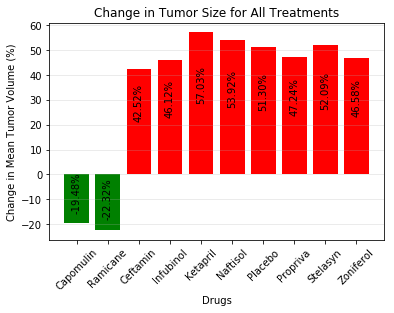

In [23]:
#Use Masking to format treatments that decreased tumor size to green, all others to red.
plt.bar(sumDF[sumDF['Tumor Pct Change']<=0].index,sumDF[sumDF['Tumor Pct Change']<=0]['Tumor Pct Change'],color = 'green')
plt.bar(sumDF[sumDF['Tumor Pct Change']>0].index,sumDF[sumDF['Tumor Pct Change']>0]['Tumor Pct Change'],color = 'red')

#Format x-ticks
plt.xticks(rotation=45)
plt.grid(b=True,axis='y',alpha=0.3)

rectsg = plt.bar(sumDF[sumDF['Tumor Pct Change']<=0].index,sumDF[sumDF['Tumor Pct Change']<=0]['Tumor Pct Change'],color = 'green').patches
rectsr = plt.bar(sumDF[sumDF['Tumor Pct Change']>0].index,sumDF[sumDF['Tumor Pct Change']>0]['Tumor Pct Change'],color = 'red').patches

for rect, label in zip(rectsg, sumgraphlabelsg):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height * 0.8, label,
            ha='center', va='bottom',rotation = 90)
for rect, label in zip(rectsr, sumgraphlabelsr):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height *0.5, label,
            ha='center', va='bottom',rotation = 90)

#Format Axes Labesl
plt.xlabel('Drugs')
plt.ylabel('Change in Mean Tumor Volume (%)')
plt.title('Change in Tumor Size for All Treatments')

# Save the Figure to Same Directory
plt.savefig("./Images/summary_BarGraph.png")

#Show Figure
plt.show()